**잠깐! 2008_2023.zip([링크](https://drive.google.com/file/d/1NFi6G0gIXME6qIx2Ku0M0wdLz1AKHZH8/view?usp=sharing))에서 다운로드 후 Colab에 업로드 해주세요**   
**64.8MB이므로 업로드에 시간이 다소(5~10분) 걸릴 수 있습니다**

In [1]:
import pandas as pd
import os

In [2]:
df = pd.read_csv("2008_2023.zip", compression="zip")
df.head()

<ipython-input-2-65e0e1e15ea7>:1: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("2008_2023.zip", compression="zip")


,자치구명,법정동명,본번,부번,건물명,계약일,물건금액(만원),건물면적(㎡),층,건축년도,건물용도,인덱스,주소
0,강북구,수유동,412.0,142.0,인성하이츠빌,2009-01-02,15000,43.86,3.0,2008.0,연립다세대,강북구 수유동 인성하이츠빌,강북구 수유동
1,강서구,화곡동,338.0,1.0,유니크빌라(338-1),2008-03-11,5800,24.78,-1.0,2001.0,연립다세대,강서구 화곡동 유니크빌라(338-1),강서구 화곡동
2,금천구,시흥동,384.0,12.0,남서울건영2,2008-03-11,14000,41.34,13.0,1989.0,아파트,금천구 시흥동 남서울건영2,금천구 시흥동
3,강서구,화곡동,95.0,80.0,유니크맨션나동,2008-03-11,12800,40.61,2.0,2002.0,연립다세대,강서구 화곡동 유니크맨션나동,강서구 화곡동
4,양천구,목동,925.0,0.0,목동신시가지7,2008-03-11,62000,66.60,2.0,1986.0,아파트,양천구 목동 목동신시가지7,양천구 목동


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2150652 entries, 0 to 2150651
Data columns (total 13 columns):
 #   Column    Dtype  
---  ------    -----  
 0   자치구명      object 
 1   법정동명      object 
 2   본번        object 
 3   부번        float64
 4   건물명       object 
 5   계약일       object 
 6   물건금액(만원)  int64  
 7   건물면적(㎡)   float64
 8   층         float64
 9   건축년도      float64
 10  건물용도      object 
 11  인덱스       object 
 12  주소        object 
dtypes: float64(4), int64(1), object(8)
memory usage: 213.3+ MB


## 데이터 전처리

#### 계약일을 datetime 형태로 변환


`pd.to_datetime()`는 문자열을 datetime 형태로 변환하는 함수입니다   
datetime으로 변환해두면 시간 단위로 연산이 가능해집니다

In [4]:
df["계약일"] = pd.to_datetime(df["계약일"], format="%Y-%m-%d")

#### 중복 행 제거
`.drop_duplicates()`: 데이터에 중복되는 행이 있어 중복되는 행 중 하나의 행만 남기고 삭제합니다   
`.shape`: 데이터의 행열 수를 계산합니다


In [5]:
print(f"중복 행 제거 전 df의 행열 수: {df.shape}")
df = df.drop_duplicates()
print(f"중복 행 제거 후 df의 행열 수: {df.shape}")

중복 행 제거 전 df의 행열 수: (2150652, 13)
중복 행 제거 후 df의 행열 수: (2150642, 13)


### 데이터 분석



In [6]:
# matplotlib 및 seaborn에서 한글 글꼴 표시하기 위함
!pip install koreanize-matplotlib

In [7]:
import koreanize_matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

물건 금액이 만원 단위라 값이 커 편하게 값을 확인하기 힘듭니다   
단위를 억으로 바꾸어 값을 확인하기 편하게 만들어 줍니다

In [8]:
df["금액(억)"] = df["물건금액(만원)"] / 10000

2008~2023 실거래 거래금액 상위 5건 지역 및 금액을 DataFrame 형태로 확인해봅니다

In [9]:
df.sort_values(by="금액(억)", ascending=False).head()

,자치구명,법정동명,본번,부번,건물명,계약일,물건금액(만원),건물면적(㎡),층,건축년도,건물용도,인덱스,주소,금액(억)
2040871,용산구,한남동,NaN,NaN,NaN,2022-01-11,11087780,1742.90,NaN,1970.0,단독다가구,NaN,용산구 한남동,1108.778
2052014,용산구,한남동,NaN,NaN,NaN,2022-02-11,11087780,1742.90,NaN,1970.0,단독다가구,NaN,용산구 한남동,1108.778
2133475,강남구,논현동,NaN,NaN,NaN,2023-11-09,3250000,486.75,NaN,1978.0,단독다가구,NaN,강남구 논현동,325.000
2044959,성동구,성수동1가,NaN,NaN,NaN,2021-12-15,3000000,1494.00,NaN,1984.0,단독다가구,NaN,성동구 성수동1가,300.000
2043868,강남구,역삼동,NaN,NaN,NaN,2021-12-20,3000000,2536.72,NaN,2007.0,단독다가구,NaN,강남구 역삼동,300.000


2008~2023 실거래 거래금액 상위 5건 지역 및 금액을 시각화 해봅니다

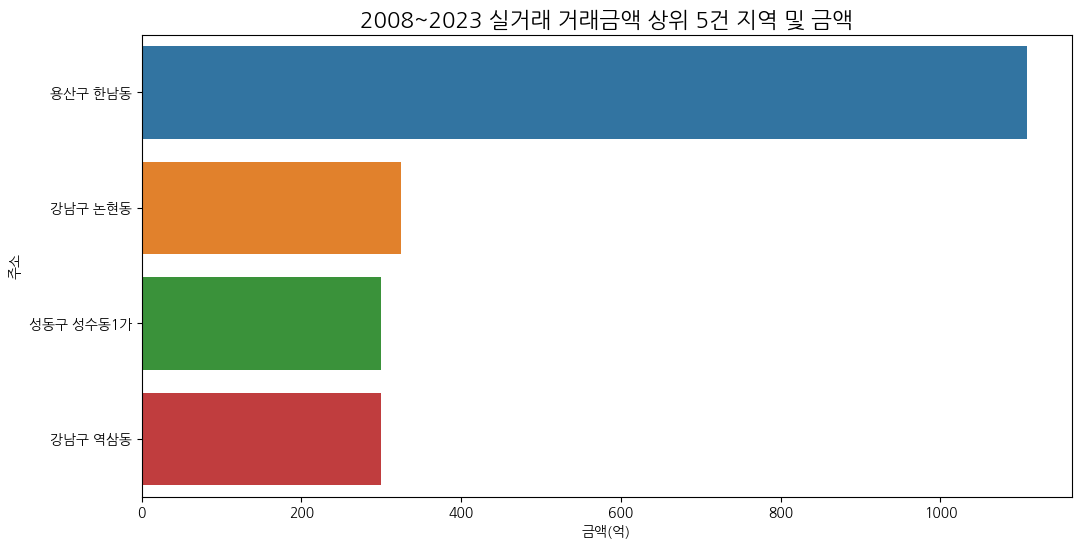

In [10]:
plt.figure(figsize=(12, 6))
sns.barplot(
    data=df.sort_values(by="금액(억)", ascending=False).head(),
    x="금액(억)",
    y="주소"
)
plt.title("2008~2023 실거래 거래금액 상위 5건 지역 및 금액",fontsize=16)
plt.show()

#### 연도별 각 자치구 금액 비교

`df["계약일"].dt.year`: 계약일 열의 값들 중에서 연도에 해당하는 값만 추출   
`df["계약일"].dt.month`: 계약일 열의 값들 중에서 월에 해당하는 값만 추출   
`df["계약일"].dt.day`: 계약일 열의 값들 중에서 일에 해당하는 값만 추출

In [11]:
df["계약연도"] = df["계약일"].dt.year
gu_year_df = df.groupby(["자치구명", "계약연도"])["금액(억)"].median().reset_index()
gu_year_df

,자치구명,계약연도,금액(억)
0,강남구,2006,5.815
1,강남구,2007,3.150
2,강남구,2008,3.500
3,강남구,2009,6.630
4,강남구,2010,5.700
...,...,...,...
440,중랑구,2019,3.650
441,중랑구,2020,3.620
442,중랑구,2021,3.500
443,중랑구,2022,3.300


plotly의 시각화 기능을 자주 쓸 예정이므로 함수로 구현해줍니다

In [14]:
import plotly.express as px
def lineplot(df, x, y, color, title):
    fig = px.line(
        df,
        x=x,
        y=y,
        color=color,
    )
    fig.update_layout(
        title=title,
        title_x = 0.5,
    )
    fig.update_xaxes(range=[2008, 2023])

    return fig

함수로 선언한 `lineplot`을 호출합니다

In [15]:
lineplot(
    gu_year_df,
    x="계약연도",
    y="금액(억)",
    color="자치구명",
    title="2008~2023 자치구별 거래금액(억) 중앙값"
    )

- 무슨 일인지 22년의 거래금액(억) 중앙값이 급락하였습니다

#### 건물용도별 금액 변화 비교

`Series.reset_index()`를 할 경우 인덱스에 있는 값들을 열(column)로 만들어 줍니다   
건물용도, 자치구명, 계약연도로 그룹핑 된 행들의 금액(억) 중앙값을 계산합니다

In [16]:
purpose_gu_year_df = df.groupby(["건물용도", "자치구명", "계약연도"])["금액(억)"].median().reset_index()
purpose_gu_year_df

,건물용도,자치구명,계약연도,금액(억)
0,단독다가구,강남구,2007,18.45000
1,단독다가구,강남구,2008,16.00000
2,단독다가구,강남구,2009,16.90000
3,단독다가구,강남구,2010,17.00000
4,단독다가구,강남구,2011,20.25000
...,...,...,...,...
1733,오피스텔,중랑구,2019,1.59000
1734,오피스텔,중랑구,2020,1.40000
1735,오피스텔,중랑구,2021,1.50000
1736,오피스텔,중랑구,2022,2.22000


In [17]:
def lineplot_by_purpose(df, x, y, color, purpose):
    return lineplot(
        df[df["건물용도"]==purpose].iloc[:, 1:],
        x=x,
        y=y,
        color=color,
        title=f"2008~2023 {purpose} 자치구별 중앙값 {y}"
        )

In [18]:
purpose = purpose_gu_year_df["건물용도"].unique()
for p in purpose:
    fig = lineplot_by_purpose(
        purpose_gu_year_df,
        x="계약연도",
        y="금액(억)",
        color="자치구명",
        purpose=p,
        )
    fig.show()

- 단독다가구의 경우 강남, 서초구만 큰 폭으로 상승한 것을 볼 수 있습니다
- 아파트의 경우 대부분 꾸준히 우상향 한 것을 볼 수 있습니다
- 아파트의 경우 22년에 강남 3구 + 용산구만 상승한 것을 볼 수 있습니다
- 연립다세대의 경우 특히 도봉구가 약세인 것을 볼 수 있습니다
- 오피스텔의 경우 오름세가 전반적으로 평이한 것을 볼 수 있습니다


#### 연도별 각 자치구 평당 금액 비교

이제 평당 금액으로 비교해봅시다

In [19]:
df["평"] = df["건물면적(㎡)"] / 3.3
df["평당금액(억)"] = df["금액(억)"] / df["평"]

In [20]:
gu_year_price_per_py_df = df.groupby(["자치구명", "계약연도"])["평당금액(억)"].median().reset_index()
gu_year_price_per_py_df

,자치구명,계약연도,평당금액(억)
0,강남구,2006,0.283065
1,강남구,2007,0.171627
2,강남구,2008,0.193769
3,강남구,2009,0.296770
4,강남구,2010,0.272222
...,...,...,...
440,중랑구,2019,0.194358
441,중랑구,2020,0.214134
442,중랑구,2021,0.231695
443,중랑구,2022,0.257812


In [21]:
lineplot(
    gu_year_price_per_py_df,
    x="계약연도",
    y="평당금액(억)",
    color="자치구명",
    title="2008~2023 자치구별 평당금액(억) 중앙값"
    )

- 강남, 용산, 서초 순으로 평당 금액이 비싼것을 볼 수 있습니다
- 강북구가 가장 평당 금액이 낮은 것을 볼 수 있습니다

In [22]:
purpose_gu_year_price_per_py_df = df.groupby(["건물용도", "자치구명", "계약연도"])["평당금액(억)"].median().reset_index()
purpose_gu_year_price_per_py_df

,건물용도,자치구명,계약연도,평당금액(억)
0,단독다가구,강남구,2007,0.130872
1,단독다가구,강남구,2008,0.138733
2,단독다가구,강남구,2009,0.157809
3,단독다가구,강남구,2010,0.156520
4,단독다가구,강남구,2011,0.166832
...,...,...,...,...
1733,오피스텔,중랑구,2019,0.168848
1734,오피스텔,중랑구,2020,0.165864
1735,오피스텔,중랑구,2021,0.178378
1736,오피스텔,중랑구,2022,0.244746


In [23]:
for p in purpose:
    fig = lineplot_by_purpose(
        purpose_gu_year_price_per_py_df,
        x="계약연도",
        y="평당금액(억)",
        color="자치구명",
        purpose=p,
        )
    fig.show()

- 용산구의 연립다세대 평당 금액이 급격히 오른 것을 볼 수 있습니다
- 아파트를 제외한 오피스텔, 단독다가구, 연립다세대 평당 금액이 가장 비싼 곳은 용산구인 것을 볼 수 있습니다
- 아파트는 다른 건물용도들과 다르게 자치구들이 비슷한 상승 패턴을 보이고 있습니다